<a href="https://colab.research.google.com/github/B21-CAP0133/verify-android-app/blob/ML/ML-dir/04_VERIFY_Build_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from matplotlib import pyplot as plt
import seaborn as sns
import pickle
import numpy as np

In [ ]:
df = pd.read_csv('verify_dataset_clean.csv')
df.sample(5)

,Judul,Label
1252,cocoklogi pki 1965 pki 2017,0
1449,arseto pariadji serah diri polisi,0
939,syiah indonesia,0
1514,nama meikarta ambil tragedi mei jakarta 98,0
137,jokowi sdh kunjung christchurch,1


In [ ]:
x_train_text, x_test_text, y_train, y_test = train_test_split(df['Judul'], df['Label'], test_size=0.1)

In [ ]:
transformer = TfidfVectorizer(
    ngram_range = (1, 2), 
    max_features = None,
    max_df = 0.5,
    use_idf = True,
    norm = 'l2'
    )

In [ ]:
x_train = transformer.fit_transform(x_train_text)
x_test = transformer.fit_transform(x_test_text)

In [ ]:
x_train_text.shape, x_test_text.shape

((2129,), (237,))

In [ ]:
len(y_train), len(y_test)

(2129, 237)

In [ ]:
verify_logreg = LogisticRegression(
    C = 774.2636826811278, 
    solver='saga', 
    penalty = 'l1',
    max_iter = 5000
    )

In [ ]:
skf = StratifiedKFold(
    n_splits=10,
    shuffle=True,
    random_state=17
    )

In [ ]:
cv_results = cross_val_score(
    verify_logreg, 
    x_train, 
    y_train, 
    cv=skf, 
    scoring='accuracy'
    )

In [ ]:
cv_results, cv_results.mean()

(array([0.77464789, 0.8028169 , 0.77464789, 0.80751174, 0.8028169 ,
        0.75586854, 0.74647887, 0.79342723, 0.76525822, 0.81603774]),
 0.7839511914252812)

In [ ]:
verify_logreg.fit(x_train, y_train)

LogisticRegression(C=774.2636826811278, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=5000, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
test_preds = verify_logreg.predict(x_test)

In [ ]:
dfP = pd.DataFrame(x_test_text, columns=['Judul'])
dfP['Predict'] = test_preds
dfP['True'] = y_test

In [ ]:
dfP.head()

,Judul,Predict,True
2038,gibran tantang rocky gerung debat buka tvone,1,1
911,kapolda anton charliyan tibatiba laku citra pa...,0,0
783,bpjs ketenagakerjaan edar sms beri hadiah dana...,1,0
1191,polisi tangkap rekayasa chat hoax kapolri kapo...,0,0
1901,terb0ngkar c1n pk beli semua tanah strategi in...,1,1


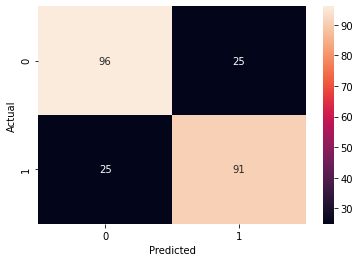

In [ ]:
confusion_matrix = pd.crosstab(dfP['True'], dfP['Predict'], rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [ ]:
verify_logreg_model = 'verify_logreg_model.sav'
pickle.dump(verify_logreg, open(verify_logreg_model, 'wb'))

In [ ]:
predict_proba = verify_logreg.predict_proba(x_test)

In [ ]:
i = 0
hoax_prob_long = []
for hoax in predict_proba:
  hoax_prob_long.append(predict_proba[i,1]*100)
  i+=1

hoax_prob = []
for j in hoax_prob_long:
  hoax_prob.append('{:.1f}'.format(j))

In [ ]:
dfP['Hoax Probaility'] = hoax_prob

In [ ]:
dfP.head()

,Judul,Predict,True,Hoax Probaility
2038,gibran tantang rocky gerung debat buka tvone,1,1,69.9
911,kapolda anton charliyan tibatiba laku citra pa...,0,0,28.8
783,bpjs ketenagakerjaan edar sms beri hadiah dana...,1,0,86.5
1191,polisi tangkap rekayasa chat hoax kapolri kapo...,0,0,0.1
1901,terb0ngkar c1n pk beli semua tanah strategi in...,1,1,99.6


In [ ]:
dfP.loc[dfP['True'] == 1, 
       'True'] = 'HOAX'
dfP.loc[dfP['True'] == 0, 
       'True'] = 'BUKAN HOAX'

In [ ]:
dfP_final = dfP.drop(columns=['Predict'])

In [ ]:
dfP_final.columns = ['Judul', 'Actual', 'Hoax Probability']

dfP_final = dfP_final[['Judul', 'Hoax Probability', 'Actual']]

dfP_final.head()

,Judul,Hoax Probability,Actual
2038,gibran tantang rocky gerung debat buka tvone,69.9,HOAX
911,kapolda anton charliyan tibatiba laku citra pa...,28.8,BUKAN HOAX
783,bpjs ketenagakerjaan edar sms beri hadiah dana...,86.5,BUKAN HOAX
1191,polisi tangkap rekayasa chat hoax kapolri kapo...,0.1,BUKAN HOAX
1901,terb0ngkar c1n pk beli semua tanah strategi in...,99.6,HOAX


In [ ]:
dfP_final.to_csv('hasil_verify_logreg_model.csv', index=False)